In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from qutip import Qobj, sigmax

%matplotlib inline

In [7]:
# constants
gamma_e = 5.25  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
# omega_d = ?  # drive frequency
# omega_q = ?  # transition frequency between |e> and |f> levels
# J = gamma_e / 4  # coupling strength?
# Delta = 0  # detuning

In [8]:
J_list = np.linspace(0, 8, num=100)
Delta_list = np.linspace(-4, 4, num=100)
J_grid, Delta_grid = np.meshgrid(J_list, Delta_list)
dlambda_grid = np.zeros(J_grid.shape, dtype=complex)

for J_idx, J in enumerate(J_list):
    for Delta_idx, Delta in enumerate(Delta_list):
        Delta *= 2 * np.pi
        
        # effective Hamiltonian
        H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])

        lambda_m, lambda_p = H_eff.eigenenergies()
        dlambda = lambda_p - lambda_m
        dlambda_grid[Delta_idx, J_idx] = dlambda

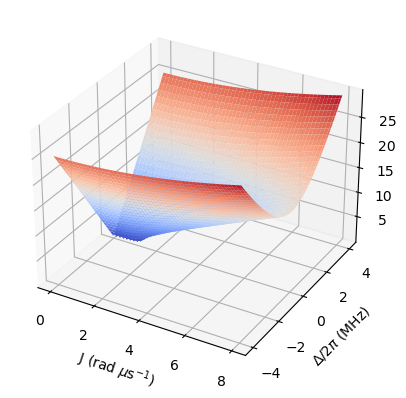

In [9]:
### Figure 1c ###

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(J_grid, Delta_grid, dlambda_grid.real, cmap=cm.coolwarm)
ax.set_xlabel('J (rad $\mu\mathrm{s}^{-1}$)')
ax.set_ylabel('$\Delta / 2\pi$ (MHz)')
ax.set_zlabel('Re($\delta\lambda$)');

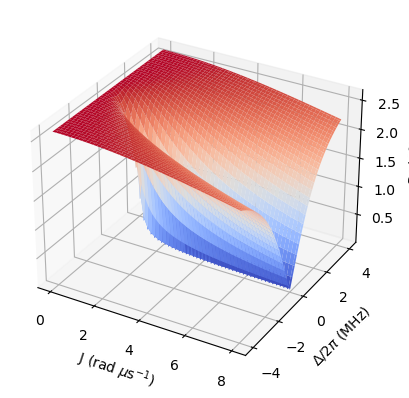

In [10]:
### Figure 1d ###

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(J_grid, Delta_grid, np.abs(dlambda_grid.imag), cmap=cm.coolwarm)
ax.set_xlabel('J (rad $\mu\mathrm{s}^{-1}$)')
ax.set_ylabel('$\Delta / 2\pi$ (MHz)')
ax.set_zlabel('Re($\delta\lambda$)');